In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, glob
import numpy as np
import glob
import h5py
import fsspec
from pyproj import Proj, CRS
import matplotlib.pyplot as plt
import shapely.wkt as wkt
import rasterio
from rasterio.crs import CRS
from rasterio.transform import from_origin
from rasterio import merge
import folium
from folium import plugins
import rioxarray
import matplotlib as mpl
import sys
sys.path.append('../../')
from src.cslc_utils import read_cslc, cslc_info, rasterWrite, custom_merge, colorize, getbasemaps, moving_window_mean

import warnings
warnings.filterwarnings('ignore')

In [3]:
data_dir = '/u/trappist-r0/kdevlin/work/CSLC/Tulare/D144/stack'
burst_id = ['t144_308014_iw2', 
            't144_308015_iw2']
date = [os.path.basename(x) for x in glob.glob(f'{data_dir}/{burst_id[0]}/{burst_id[0]}/2*')]
date = sorted(date)
nd = len(date)
save_fn = f'SJV_{date[1]}-{date[0]}_{burst_id[0][:4]}.tif'

In [4]:
# Read before and after event dataset 
before = []; after = []  

for id in burst_id:
    path_h5 = f'{data_dir}/{id}/{id}/{date[0]}/{id}_{date[0]}.h5'
    dat = read_cslc(path_h5)
    before.append(dat)

for id in burst_id:   
    path_h5 = f'{data_dir}/{id}/{id}/{date[1]}/{id}_{date[1]}.h5' 
    dat = read_cslc(path_h5)
    after.append(dat)

Opening: /u/trappist-r0/kdevlin/work/CSLC/Tulare/D144/stack/t144_308014_iw2/t144_308014_iw2/20170601/t144_308014_iw2_20170601.h5
Opening: /u/trappist-r0/kdevlin/work/CSLC/Tulare/D144/stack/t144_308015_iw2/t144_308015_iw2/20170601/t144_308015_iw2_20170601.h5
Opening: /u/trappist-r0/kdevlin/work/CSLC/Tulare/D144/stack/t144_308014_iw2/t144_308014_iw2/20170613/t144_308014_iw2_20170613.h5
Opening: /u/trappist-r0/kdevlin/work/CSLC/Tulare/D144/stack/t144_308015_iw2/t144_308015_iw2/20170613/t144_308015_iw2_20170613.h5


In [5]:
xcoor, ycoor, dx, dy, epsg, bounding_polygon1, orbit_direction = cslc_info(f'{data_dir}/{burst_id[0]}/{burst_id[0]}/{date[1]}/{burst_id[0]}_{date[1]}.h5')
cslc_poly1 = wkt.loads(bounding_polygon1)
bbox1 = [cslc_poly1.bounds[0], cslc_poly1.bounds[2], cslc_poly1.bounds[1], cslc_poly1.bounds[3]]

In [6]:
xcoor, ycoor, dx, dy, epsg, bounding_polygon2, orbit_direction = cslc_info(f'{data_dir}/{burst_id[1]}/{burst_id[1]}/{date[1]}/{burst_id[1]}_{date[1]}.h5')
cslc_poly2 = wkt.loads(bounding_polygon2)
bbox2 = [cslc_poly2.bounds[0], cslc_poly2.bounds[2], cslc_poly2.bounds[1], cslc_poly2.bounds[3]]

In [7]:
intersect = cslc_poly1.intersection(cslc_poly2)
poly = intersect.convex_hull

In [17]:
print(poly)

POLYGON ((-118.9227809856433 36.0291493268433, -119.9503660055511 36.17607407327942, -119.9022388449072 36.16940120648542, -119.8531949642625 36.16258020403497, -119.8039138589259 36.15570481838717, -119.7543894095284 36.14877387638862, -119.7046152539665 36.14178615832103, -119.6545847740097 36.13474039533254, -119.6042910809503 36.12763526668498, -119.5537270002085 36.12046939680103, -119.5028850548013 36.11324135209335, -119.4517574475706 36.10594963755573, -119.4003360420534 36.09859269309386, -119.3486109889812 36.0911686965801, -119.2965761115305 36.08367633033363, -119.2442207760717 36.0761136222034, -119.191535265679 36.0684787089234, -119.1385094030769 36.06076963892268, -119.0851325200881 36.05298436646553, -119.0313934244405 36.0451207452851, -118.9772803636476 36.03717652165581, -118.9227809856433 36.0291493268433))


In [18]:
poly.bounds

(-119.9503660055511, 36.0291493268433, -118.9227809856433, 36.17607407327942)

In [14]:
test = merged_line.buffer(.01)

In [15]:
exterior_coords = test.exterior.coords[:]

In [17]:
from shapely.geometry import Polygon

In [20]:
rectangle = geometry.Polygon(exterior_coords)

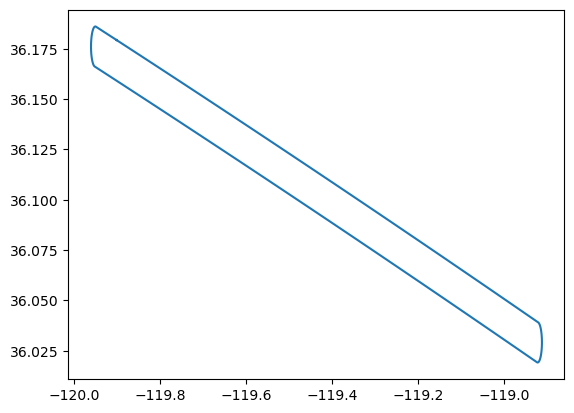

In [19]:
x,y = rectangle.exterior.xy
plt.plot(x,y)

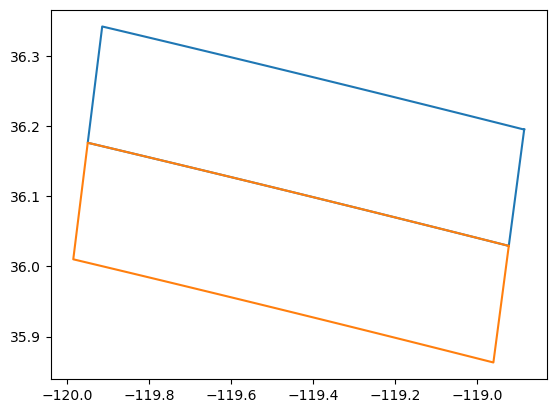

In [11]:
x1,y1 = cslc_poly1.exterior.xy
x2,y2 = cslc_poly2.exterior.xy
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.show()

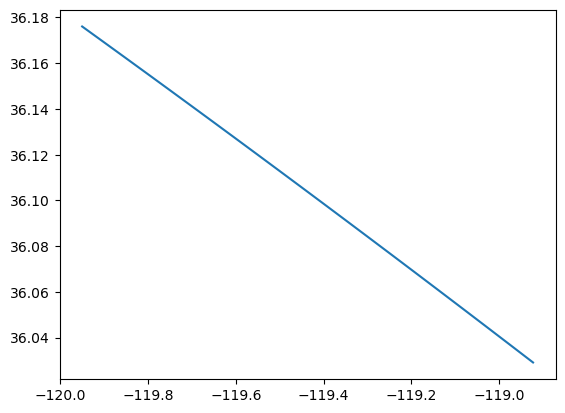

In [23]:
x,y = merged_line.xy
plt.plot(x,y)
plt.show()